In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# plt.style.use("../plt_params.mplstyle")

# order = "C" --> row-wise
# order = "F" --> col-wise

def _unpack_idxs_by(by, shape):
    i, j = np.indices(shape)
    order = {"row": "C", "col": "F"}[by]
    
    return i.ravel(order=order), j.ravel(order=order)


sector_masking_funcs = {
    "triL": lambda i, j: i >= j,
    "triU": lambda i, j: i <= j
}


def _get_square_symm_unpacking_map(by, shape, sector):
    if shape[0] != shape[1]:
        raise Exception("matrix not square!")
    
    i, j = _unpack_idxs_by(by, shape)
    mask = sector_masking_funcs[sector](i, j)
    
    return i[mask], j[mask]


def get_unpacking_map(by, shape, square_symm, sector=None):    
    if square_symm:
        i, j = _get_square_symm_unpacking_map(by, shape, sector)
    else:
        i, j = _unpack_idxs_by(by, shape)
    
    return i, j


def plot_matrix_unpack(i, j, ax=None):
    if ax is None:
        ax = plt.gca()
    cmap = matplotlib.cm.get_cmap('rainbow')
    
    ax.scatter(j, i, c=cmap(np.linspace(0, 1, len(i))))
    ax.set_xticks(np.unique(j))
    ax.set_yticks(np.unique(i))
    ax.invert_yaxis()
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    for vec_idx, (myj, myi) in enumerate(zip(j, i)):
        ax.text(myj+0.025, myi-0.025, str(vec_idx+1), fontsize=14)

## CLOE-like: Column-wise TriLower unpacking

Text(0.5, 1.0, 'CLOE-like unpacking')

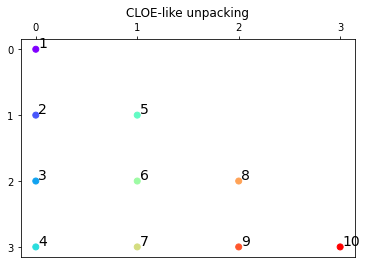

In [2]:
shape = (4, 4)

i, j = get_unpacking_map(by='col', shape=shape, square_symm=True, sector='triL')

plot_matrix_unpack(i, j)
plt.title("CLOE-like unpacking")

### Not symmetric

Text(0.5, 1.0, 'CLOE-like unpacking')

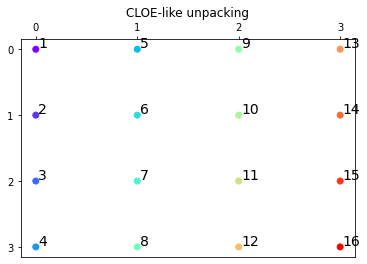

In [3]:
i, j = get_unpacking_map(by='col', shape=shape, square_symm=False)

plot_matrix_unpack(i, j)
plt.title("CLOE-like unpacking")

## SEYFERT-like unpacking

Text(0.5, 1.0, 'SEYFERT-like unpacking')

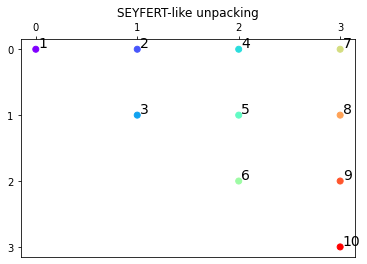

In [4]:
shape = (4, 4)

i, j = get_unpacking_map(by='col', shape=shape, square_symm=True, sector='triU')

plot_matrix_unpack(i, j)
plt.title("SEYFERT-like unpacking")

### Not symmetric

Text(0.5, 1.0, 'SEYFERT-like unpacking')

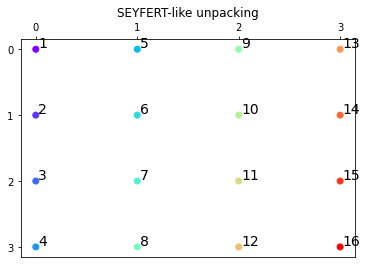

In [5]:
i, j = get_unpacking_map(by='col', shape=shape, square_symm=False)

plot_matrix_unpack(i, j)
plt.title("SEYFERT-like unpacking")

## Davide-like unpacking

Text(0.5, 1.0, 'Davide-like unpacking')

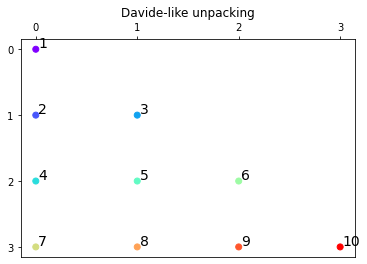

In [6]:
shape = (4, 4)

i, j = get_unpacking_map(by='row', shape=shape, square_symm=True, sector='triL')

plot_matrix_unpack(i, j)
plt.title("Davide-like unpacking")

### Not symmetric

Text(0.5, 1.0, 'Davide-like unpacking')

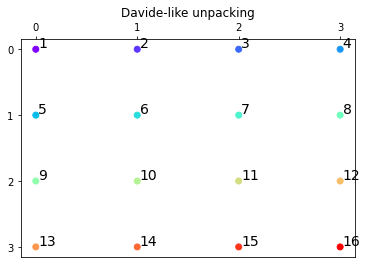

In [7]:
i, j = get_unpacking_map(by='row', shape=shape, square_symm=False)

plot_matrix_unpack(i, j)
plt.title("Davide-like unpacking")

## Producing CLOE-like indices unpacking file

Zero-based indices production

In [8]:
# WL
i_wl, j_wl = get_unpacking_map(by='col', shape=(10, 10), square_symm=True, sector='triL')

# XC(WL,GCph)
i_xc, j_xc = get_unpacking_map(by='col', shape=(10, 10), square_symm=False)

# GCph
i_ph, j_ph = get_unpacking_map(by='col', shape=(10, 10), square_symm=True, sector='triL')

ind = np.stack([
    np.concatenate([np.zeros(55), np.ones(100), np.ones(55)]), 
    np.concatenate([np.zeros(55), np.zeros(100), np.ones(55)]),
    np.concatenate([i_wl, i_xc, i_ph]), # tomographic row index
    np.concatenate([j_wl, j_xc, j_ph])  # tomographic col index
]).T

Save one-based indices

In [9]:
np.savetxt("indici_cloe_like.dat", ind+1, fmt='%i', delimiter='\t')

## Producing SEYFERT-like indices unpacking file

Zero-based indices production

In [10]:
# WL
i_wl, j_wl = get_unpacking_map(by='col', shape=(10, 10), square_symm=True, sector='triU')

# XC(WL,GCph)
i_xc, j_xc = get_unpacking_map(by='col', shape=(10, 10), square_symm=False)

# GCph
i_ph, j_ph = get_unpacking_map(by='col', shape=(10, 10), square_symm=True, sector='triU')

ind = np.stack([
    np.concatenate([np.zeros(55), np.ones(100), np.ones(55)]), 
    np.concatenate([np.zeros(55), np.zeros(100), np.ones(55)]),
    np.concatenate([i_wl, i_xc, i_ph]), # tomographic row index
    np.concatenate([j_wl, j_xc, j_ph])  # tomographic col index
]).T

Save one-based indices

In [11]:
np.savetxt("indici_seyfert_like.dat", ind+1, fmt='%i', delimiter='\t')

## Producing Davide-like indices unpacking file

Zero-based indices production

In [28]:
for zbins in range(2, 25):
    # WL
    i_wl, j_wl = get_unpacking_map(by='row', shape=(zbins, zbins), square_symm=True, sector='triL')

    # XC(WL,GCph)
    i_xc, j_xc = get_unpacking_map(by='row', shape=(zbins, zbins), square_symm=False)

    # GCph
    i_ph, j_ph = get_unpacking_map(by='row', shape=(zbins, zbins), square_symm=True, sector='triL')
    
    npairs_auto = int(zbins*(zbins+1)/2)
    npairs_cross = zbins**2

    ind = np.stack([
        np.concatenate([np.zeros(npairs_auto), np.ones(npairs_cross), np.ones(npairs_auto)]), 
        np.concatenate([np.zeros(npairs_auto), np.zeros(npairs_cross), np.ones(npairs_auto)]),
        np.concatenate([i_wl, i_xc, i_ph]), # tomographic row index
        np.concatenate([j_wl, j_xc, j_ph])  # tomographic col index
    ]).T
    
    ind = ind.astype('int')
    
    np.savetxt('/Users/davide/Documents/Lavoro/Programmi/common_data/ind_files/' +
               f'variable_zbins/indici_vincenzo_like_zbins{zbins}.dat', ind, fmt='%i', delimiter='\t')
    

Save one-based indices

In [13]:
# np.savetxt("indici_davide_like.dat", ind, fmt='%i', delimiter='\t')

## Consistency check

In [27]:
ind_new = np.genfromtxt("/Users/davide/Documents/Lavoro/Programmi/common_data/ind_files/variable_zbins/indici_vincenzo_like_zbins10.dat")
ind_old = np.genfromtxt('/Users/davide/Documents/Lavoro/Programmi/common_data/ind_files/indici_vincenzo_like_int.dat')
assert np.all(ind_new == ind_old)
ind_new == ind_old




array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
 